In [1]:
!pip install ipywidgets
!pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 KB 4.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import ipywidgets as widgets

import warnings
warnings.filterwarnings("ignore")



In [3]:
%matplotlib widget

# Reading the dataset

In [5]:
##Completed - Function to read excel file
def read_excel(file_path):
    """
    Reads an excel file into jupyter notebook as pandas dataframe
    
    Args:
        file_path(str): dataset file path
    """
    #read dataset file using pandas
    data_df = pd.read_excel(file_path) # complete this line
    
    return data_df

##TODO - replace filepath with your own dataset file path

filepath = "ENB2012_data.xlsx"
data_df = read_excel(filepath)

data_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Normalize dataset between 0 -1

In [6]:
##Completed - Scale the data between 0 - 1 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(data_df)
scaled_df = pd.DataFrame(scaled_df, columns=['X1','X2','X3','X4','X5','X6','X7','X8', 'Y1', 'Y2'])
#scaled_df.head()

In [7]:
scaled_df.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.500000,0.585938,0.562500,0.439396,0.368644
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.372921,0.333051,0.310192,0.272046,0.256216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.250000,0.350000,0.188258,0.127121
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.500000,0.625000,0.600000,0.348881,0.301104
75%,0.583333,0.770833,0.571429,1.000000,1.000000,0.750000,1.000000,0.800000,0.691763,0.598775
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
def create_scatter(feature1, feature2):
    with plt.style.context("ggplot"):
        fig = plt.figure(figsize=(8,4))

        plt.scatter(x = scaled_df[feature1],
                    y = scaled_df[feature2],
                    c= np.random.rand(scaled_df.shape[0]),
                    s=20
                   )

        plt.xlabel(feature1.capitalize())
        plt.ylabel(feature2.capitalize())

        plt.title("%s vs %s"%(feature1.capitalize(), feature2.capitalize()))

from google.colab import output
output.enable_custom_widget_manager()

interactive(children=(Dropdown(description='feature1', options=('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'…

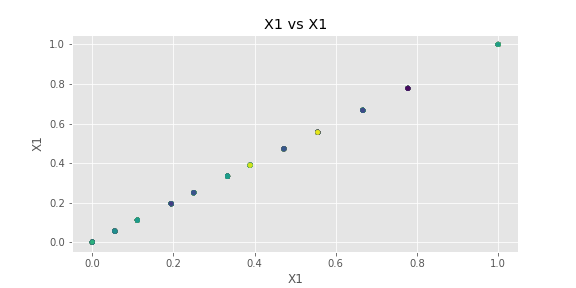

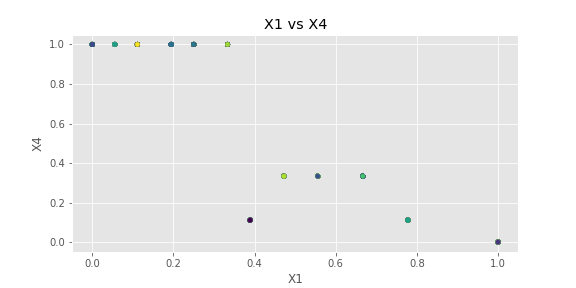

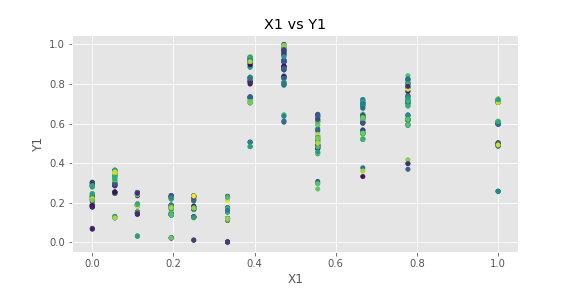

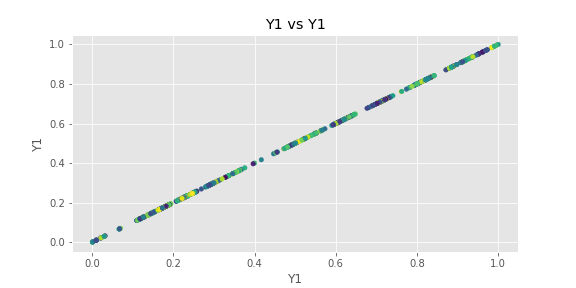

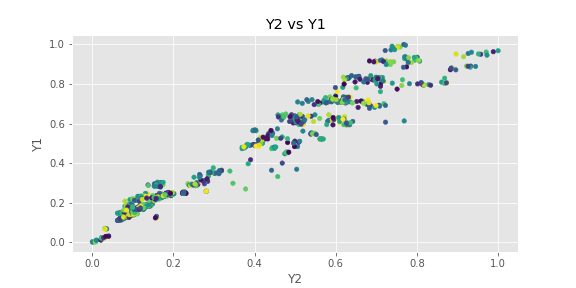

In [9]:
widgets.interact(create_scatter, feature1=scaled_df.columns, feature2=scaled_df.columns);

# Prepare Dataset Training


In [10]:
## TODO - Assign each variable in the dataset dataframe to a new variable. 

#independent variables
x1 = scaled_df.iloc[:,0].to_numpy() #extract the first independent variable and convert to numpy()

#TODO - Complete the remaining

x2 = scaled_df.iloc[:,1].to_numpy() 
x3 = scaled_df.iloc[:,2].to_numpy() 
x4 = scaled_df.iloc[:,3].to_numpy() 
x5 = scaled_df.iloc[:,4].to_numpy()
x6 = scaled_df.iloc[:,5].to_numpy()
x7 = scaled_df.iloc[:,6].to_numpy()
x8 = scaled_df.iloc[:,7].to_numpy()

#Dependent variables
y1 = scaled_df.iloc[:,8].to_numpy()
y2 = scaled_df.iloc[:,9].to_numpy()


# Build Linear Regression Model

In [11]:
## TODO - Implement hypothesis
def h(x, b = 0, w = 0):
    """
    calculates the predicted values (or predicted targets) for a given set of inputs and thetas.
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    """
    #complete the function 
    m = x.shape[0]
    for i in range(m):
      h_p[i] = w * x[i] + b
    
    return h_p 

# TODO - Implement the cost Function
def compute_cost(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters 
      
    Return:
        total_cost: scalar
    """
    ##Complete Function
    m = x.shape[0]
    cost_sum = 0

    for i in range(m):
      hp = w * x[i] + b
      cost = (y[i] - hp) ** 2
      cost_sum += cost
    
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost


def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    #complete function
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0

    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db


# Completed - Gradient Descent
def gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters):
    
    b = b_init
    w = w_init
    
    diff = compute_cost(x_train, y_train, w, b)
    
    print("initial Cost: {}".format(compute_cost(x_train, y_train, w, b)))

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient(x_train, y_train, w , b) 
        
        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw   
        
    return w, b


#Function to predict output - Completed

def predict(x, w, b):
    """
    Predicts the output value given the input x and coefficients w and b
    """

    m = x.shape[0] #number of test samples
    
    y_preds = []
    
    for i in range(m):
        
        y_pred = w * x[i] + b
        
        y_preds.append(y_pred)
        
    return np.array(y_preds)

# Train Linear Regression Model With Gradient Descent


In [12]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x1,y1, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

initial Cost: 0.03783158789943419
w_final , b_final: (  0.5803,  0.2026)


# Evaluate Model - Mean Square Error


In [13]:
## TODO - Implement evaluate_model() function which basically computes 
#the mean square error between the true output variables and predicted output variables

def evaluate_model(y_true, y_preds):
    
    """
    Args:
        y_true: true output values
        y_preds: model predicted output values
        
    Return:
        return MSE
    """
    # Complete MSE function
    n = y_true.shape[0]
    se_sum = 0
    for i in range(n):
      se = (y_true[i] - y_preds[i]) ** 2
      se_sum += se

    MSE = se_sum / n
    return MSE
    

In [14]:
##Test evaluate_model() function by run
import unittest

class TestNotebook(unittest.TestCase):
    
    def test_add(self):
        self.assertEqual(evaluate_model(np.array([2 , 2]), np.array([1.5 , 1.5])), 0.25)
        

unittest.main(argv=[''], verbosity=2, exit=False)

test_add (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


# Determining the best independent variable to predict Y1

## x1

In [15]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x1,y1, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x1 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.03783158789943419
w_final , b_final: (  0.5803,  0.2026)
0.04531315945994877


## x2

In [17]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x2,y1, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x2 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.04985120260286773
w_final , b_final: ( -0.6005,  0.7563)
0.041918010284218155


## x3


In [18]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x3,y1, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x3 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.03995325707884356
w_final , b_final: (  0.4724,  0.2352)
0.05858327753438769


## x4

In [19]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x4,y1, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x4 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.05531197462696928
w_final , b_final: ( -0.5738,  0.7839)
0.019015332567589204


## x5 

In [20]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x5,y1, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x5 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.03260345981125763
w_final , b_final: (  0.4842,  0.1964)
0.015442202623433432


## x6

In [21]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x6,y1, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x6 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.04401788561985132
w_final , b_final: (  0.0163,  0.4262)
0.07398360154901167


## x7

In [22]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x7,y1, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x7 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.04257284539894927
w_final , b_final: (  0.2330,  0.2963)
0.06859094825036384


## x8

In [23]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x8,y1, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x8 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.044073345094053244
w_final , b_final: (  0.0866,  0.3847)
0.0733943352076692


## The best variable to approximate y1

Using x5 gave the smallest MSE. Therefore, x5 is the variable that gives the best estimation for y1

# Determining the best independent variable to predict Y1

In [24]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x1,y2, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x1 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.043988195434645806
w_final , b_final: (  0.5567,  0.1425)
0.050790988755483844


In [25]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x2,y2, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x2 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.05655741176603478
w_final , b_final: ( -0.5788,  0.6752)
0.047366161129887153


In [26]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x3,y2, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x3 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.04639589914281584
w_final , b_final: (  0.4202,  0.1877)
0.0639801127716506


In [27]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x4,y2, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x4 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.06219868285774162
w_final , b_final: ( -0.5425,  0.6953)
0.02414185316214623


In [28]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x5,y2, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x5 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.03975575173869304
w_final , b_final: (  0.4618,  0.1380)
0.02053470928256186


In [29]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x7,y2, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x7 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.050578529790879734
w_final , b_final: (  0.1706,  0.2638)
0.07452222293480144


In [30]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x7,y2, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x7 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.050578529790879734
w_final , b_final: (  0.1706,  0.2638)
0.07452222293480144


In [31]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x8,y2, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")

y_pred = x8 * w_final + b_final

print(evaluate_model(y1, y_pred))

initial Cost: 0.05157330801618659
w_final , b_final: (  0.0524,  0.3348)
0.07904756076433865


## The best variable to approximate y2

Using x5 gave the smallest MSE. Therefore, x5 is the variable that gives the best estimation for y2, just like y1.